# Explore here

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import set_random_seed

In [5]:
#STEP 1: Loading the dataset
import shutil

## Defining the paths
train_dir = "/workspaces/Image-Classifier-Project-Cats-Dogs/models/train"
source_dir = "/workspaces/Image-Classifier-Project-Cats-Dogs/models/train/dog"

## Function to move cat images from 'dog' to 'cat' subfolder
def move_cat_images(source_dir, dog_subfolder, cat_subfolder):
    dog_dir = os.path.join(source_dir, dog_subfolder)
    cat_dir = os.path.join(source_dir, cat_subfolder)
    
    if not os.path.exists(dog_dir):
        print(f"Error: '{dog_subfolder}' subfolder does not exist.")
        return
    if not os.path.exists(cat_dir):
        os.makedirs(cat_dir)
        print(f"Created '{cat_subfolder}' subfolder.")

    ## Listing all files in the 'dog' subfolder
    files = os.listdir(dog_dir)

    ## Moving cat images from 'dog' to 'cat' subfolder
    for filename in files:
        if 'cat' in filename:
            src = os.path.join(dog_dir, filename)
            dst = os.path.join(cat_dir, filename)
            shutil.move(src, dst)

## Calling the function to move cat images
move_cat_images(train_dir, 'dog', 'cat')


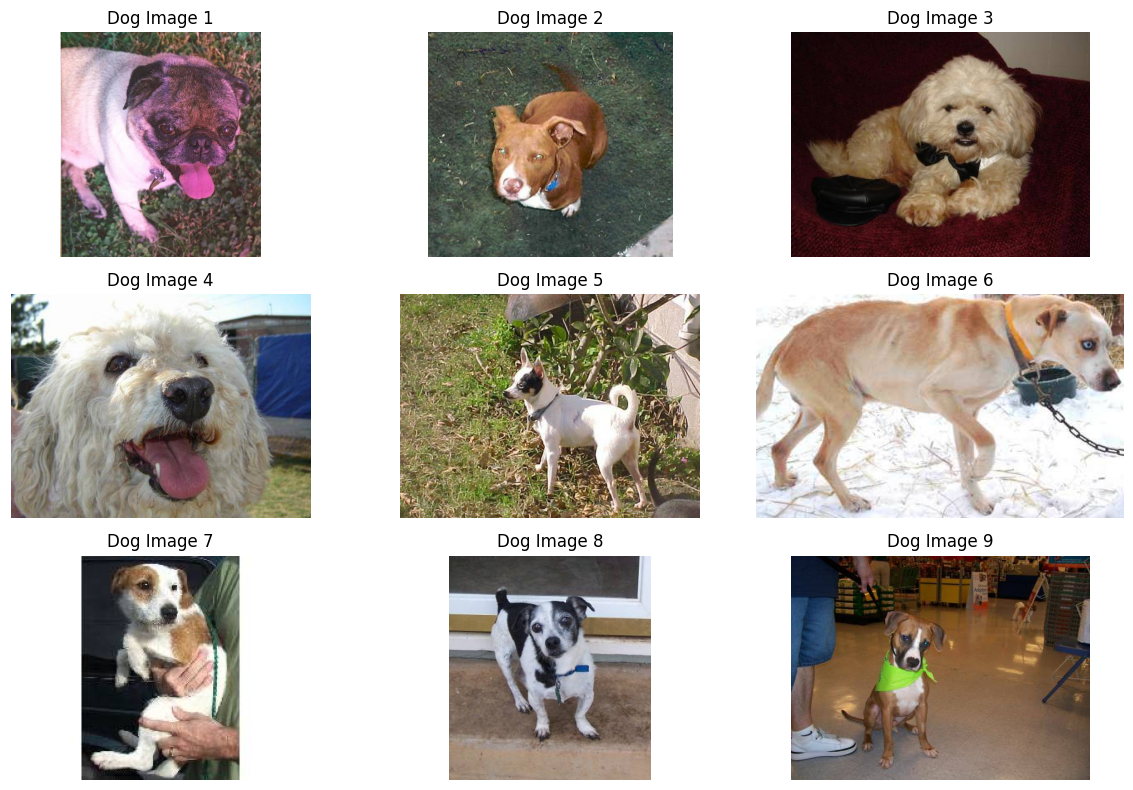

In [6]:
## Getting the first nine dog filenames
## Path to the dog subfolder
dog_dir = "/workspaces/Image-Classifier-Project-Cats-Dogs/models/train/dog"

## Getting a list of all files in the dog subfolder
dog_image_files = os.listdir(dog_dir)

## Selecting the first nine images
first_nine_dog_filenames = dog_image_files[:9]

# Plotting the first nine dog images
plt.figure(figsize=(12, 8))

for i, filename in enumerate(first_nine_dog_filenames):
    img_path = os.path.join(dog_dir, filename)
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i + 1) 
    plt.imshow(img)
    plt.title(f'Dog Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


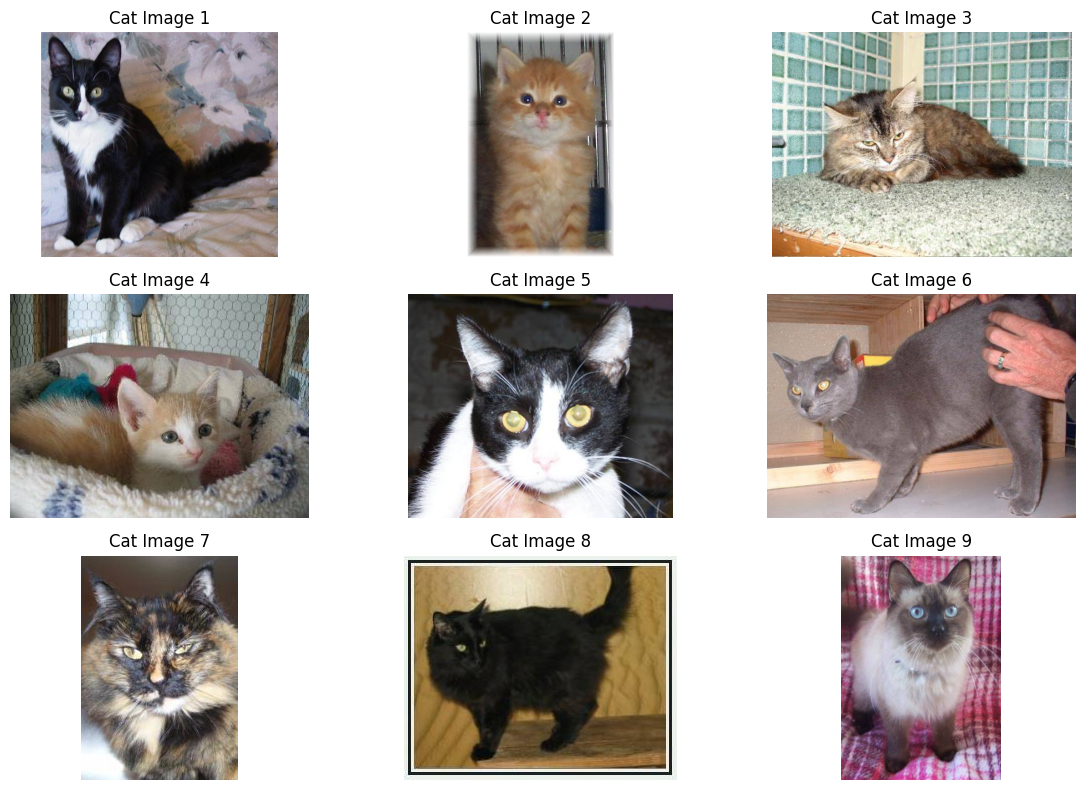

In [7]:
## Getting the first nine cat filenames
## Path to the cat subfolder
cat_dir = "/workspaces/Image-Classifier-Project-Cats-Dogs/models/train/cat"

## Getting a list of all files in the cat subfolder
cat_image_files = os.listdir(cat_dir)

## Selecting the first nine images 
first_nine_cat_filenames = cat_image_files[:9]

## Plotting the first nine cat images
plt.figure(figsize=(12, 8))

for i, filename in enumerate(first_nine_cat_filenames):
    img_path = os.path.join(cat_dir, filename)
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i + 1) 
    plt.imshow(img)
    plt.title(f'Cat Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
##Creating an ImageDataGenerator object for training and test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Paths to train and test directories
train_dir = "/workspaces/Image-Classifier-Project-Cats-Dogs/models/train"
test_dir = "/workspaces/Image-Classifier-Project-Cats-Dogs/models/test1/test"

## Initializing ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Creating training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    classes = ["dog", "cat"]
)

## Generating test data from the test folder
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200)
)


Found 25000 images belonging to 2 classes.


Found 12500 images belonging to 1 classes.


In [9]:
#STEP 3: Building an ANN model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

## Moving the Data Through the Neural Network
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

## Moving the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Compiling the model
from keras.optimizers import Adam
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model

<Sequential name=sequential_1, built=True>

In [11]:
# Train the Model
model.fit(train_generator, epochs = 5)

Epoch 1/5


/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 45/782 ━━━━━━━━━━━━━━━━━━━━ 6:36:11 32s/step - accuracy: 0.5150 - loss: 0.9954

In [ ]:
#Step 4: Optimizing the above model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2024-06-17 18:25:18.669925: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 18:25:19.768496: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 18:25:22.276251: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 18:25:25.806080: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#Step 5: Saving the model
#model.save("keras_200x200-5_42.keras")